# FEATURE IMPORTANCE FOR THE BEST MODEL

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import os
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

## LOADING FILES AND MODELS

In [2]:
train=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train.csv',sep=',')
test=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test.csv',sep=',')
X_test=test[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code']]
X_train=train[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code']]
y_test=test['Código Tipo Supuesto Urgente']
y_train=train['Código Tipo Supuesto Urgente']

In [2]:
def load_files(file):
    '''
    Cargar modelos con formato binario en un notebook o fichero python
    '''
    os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
    model = pickle.load( open( file, "rb" ) )
    return model

In [4]:
MODEL = load_files('my_best_model_BAG220912121218.pickle')

## FEATURE IMPORTANCE

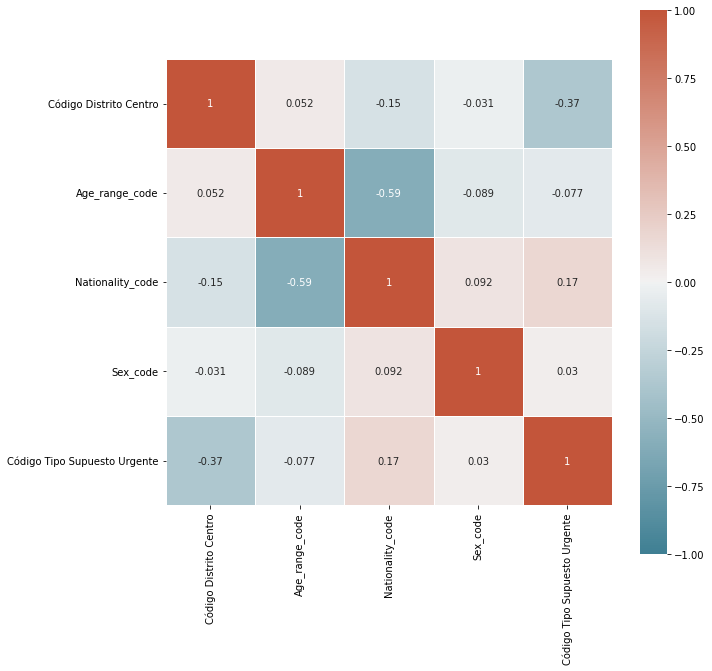

In [26]:
plt.figure(figsize=(10,10))

sns.heatmap(train.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(220, 20, as_cmap=True),
            square=True,
            annot=True,
            linewidths=.5);

In [5]:
MODEL

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=9,
                                                        random_state=20),
                  max_features=4, max_samples=500, n_estimators=250,
                  random_state=20)

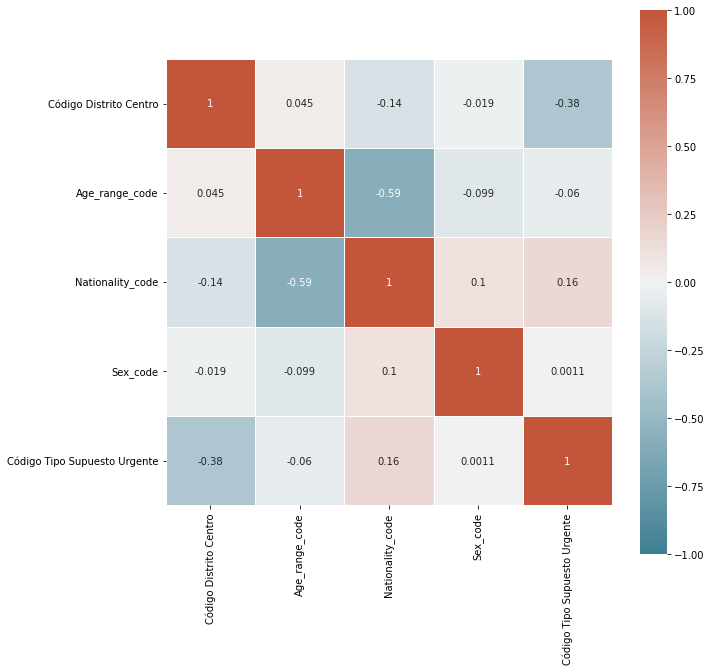

In [27]:

plt.figure(figsize=(10,10))

sns.heatmap(test.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(220, 20, as_cmap=True),
            square=True,
            annot=True,
            linewidths=.5);

In [6]:
feature_importances = np.mean([tree.feature_importances_ for tree in MODEL.estimators_], axis=0)
print("Importancia, ",feature_importances)
print("Nombres, ",MODEL.feature_names_in_)

Importancia,  [0.49235336 0.38964223 0.05984213 0.05816228]
Nombres,  ['Código Distrito Centro' 'Age_range_code' 'Nationality_code' 'Sex_code']


In [10]:
#MODEL.feature_importances_

df_feature_train=pd.DataFrame(feature_importances,
#    MODEL.feature_importances_,
                          MODEL.feature_names_in_, 
                          columns = ["Feature importance"]).sort_values("Feature importance", ascending=False)


In [11]:
df_feature_train

,Feature importance
Código Distrito Centro,0.492353
Age_range_code,0.389642
Nationality_code,0.059842
Sex_code,0.058162


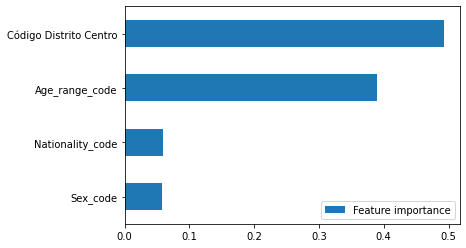

In [51]:
df_feature_train.sort_values("Feature importance").plot.barh(y='Feature importance');

En este DataFrame se ve claramente el orden de importancia que establece el módelo a cada Feature.

Así el módelo establece un **mayor valor** al Código de Distrito Centro, esto es al lugar de residencia de la persona usuaria y un *menor valor* al Sexo de la persona usuaria.

## PERMUTATION IMPORTANCE

In [45]:
from sklearn.inspection import permutation_importance

perm_train = permutation_importance(estimator=MODEL,
                                    X = X_train,
                                    y = y_train,
                                    n_repeats = 10,
                                    random_state=20,
                                    scoring="f1_micro")

In [47]:
perm_train.importances_mean
df_perm_train = pd.DataFrame(perm_train.importances_mean,
                          MODEL.feature_names_in_, 
                          columns = ["Feature importance"]).sort_values("Feature importance", ascending=False)
### CODE ####
df_perm_train

,Feature importance
Código Distrito Centro,0.220280
Age_range_code,0.131629
Nationality_code,0.032634
Sex_code,0.000053


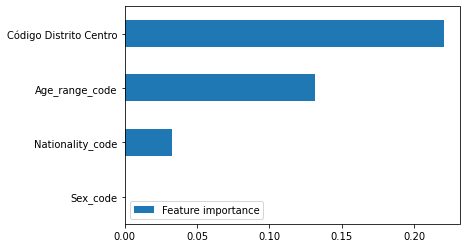

In [49]:
df_perm_train.sort_values("Feature importance").plot.barh(y='Feature importance');

Con este nuevo módelo de análisis de features se ve aún con más nitidez lo visto en el anterior.

Aqui se puede observar que el feature *SEXO* apenas afecta a las decisiones del módelo para dar un resultado u otro.